In [2]:
import pandas as pd

file = "MiddleEast_2015-2024_Nov01.csv"

df = pd.read_csv(file)
df


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,PSE62716,2024-11-01,2024,1,Strategic developments,Strategic developments,Looting/property destruction,Settlers (Israel),NaN,Political militia,...,Shi'b Al Batim,31.3942,35.1365,1,PLO Negotiations Affairs Department,Other,"Land seizure: On 1 November 2024, Israeli sett...",0,NaN,1730758098
1,YEM93235,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Dawran ad Daydah,14.7393,44.2066,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
2,YEM93304,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Uzlat Al Aqibah,13.8786,43.7357,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
3,YEM93309,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Al Junayd,14.0842,44.0575,1,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
4,YEM93315,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Uzlat Al Ajum,14.0936,43.9495,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476224,YEM32562,2015-01-01,2015,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Yemen),NaN,Political militia,...,Shibam,15.9214,48.6362,1,Barakish; Hadarem; Yemen Data Project,Local partner-National,Three soldiers were reportedly injured in an I...,0,NaN,1690843540
476225,YEM32563,2015-01-01,2015,1,Political violence,Battles,Armed clash,Military Forces of Yemen (2012-2022) Hadi,NaN,State forces,...,Nakhla,15.6160,45.1987,1,Al Jazeera; AP; Barakish; Yemen Data Project; ...,Local partner-National,"On 1 January 2015, Islah-affiliated tribesmen ...",9,NaN,1690843540
476226,YEM32564,2015-01-01,2015,1,Political violence,Battles,Armed clash,Military Forces of Yemen (2012-2022) Hadi,NaN,State forces,...,As Suhayl,15.5469,45.1265,1,Al Jazeera; AP; Barakish; Yemen Data Project; ...,Local partner-National,"On 1 January 2015, Islah-affiliated tribesmen ...",9,NaN,1690843540
476227,YEM32559,2015-01-01,2015,1,Political violence,Battles,Armed clash,AQAP: Al Qaeda in the Arabian Peninsula,Popular Resistance,Rebel group,...,Al Qayfa,14.5322,44.8228,2,Barakish; Yemen Data Project,Local partner-National,Houthi forces clashed with armed tribesmen bac...,0,NaN,1695070249


In [ ]:
# Group by event_type and aggregate unique sub_event_type values
unique_event_subs = df.groupby('event_type')['sub_event_type'].unique()

# Convert the result to a dictionary (optional)
unique_event_subs_dict = unique_event_subs.to_dict()

# Print the result in a nice format

for event, sub_events in unique_event_subs_dict.items():
    print(f"{event}:")
    for sub_event in sub_events:
        print(f"  - {sub_event}")


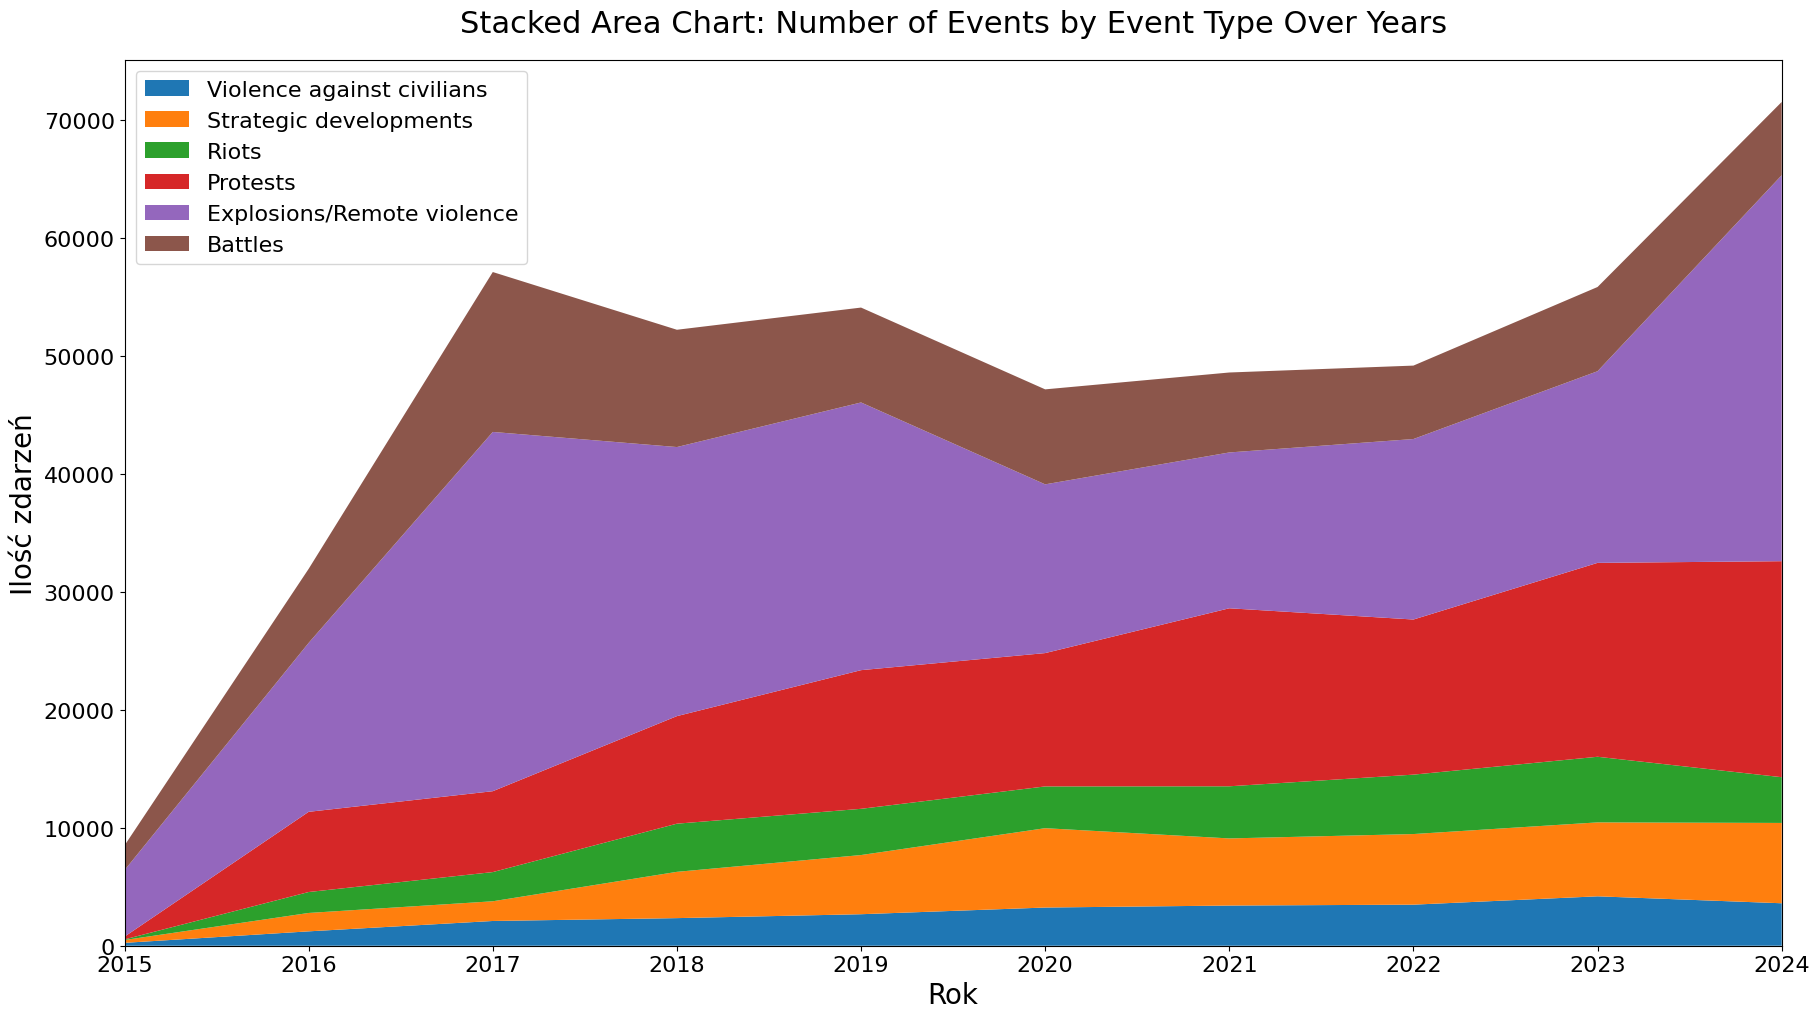

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Increase default font sizes and figure size
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(20, 12))  # 10x bigger than original (10,6)

# Group by year and event_type, counting events
area_data = df.groupby(['year', 'event_type'])['event_id_cnty'].count().unstack(fill_value=0)

# Reindex to include all years from 2015 to 2024
full_years = pd.RangeIndex(start=2015, stop=2025, step=1)
area_data = area_data.reindex(full_years, fill_value=0).sort_index()

# Reverse column order for legend
reversed_columns = area_data.columns[::-1]

# Plot stacked area with reversed order
plt.stackplot(
    area_data.index,
    [area_data[col] for col in reversed_columns],
    labels=reversed_columns
)

plt.title("Stacked Area Chart: Number of Events by Event Type Over Years", pad=20, fontsize=22)
plt.xlabel("Rok", fontsize=20)
plt.ylabel("Ilość zdarzeń", fontsize=20)

# Create legend at upper left with reversed order
legend = plt.legend(
    loc="upper left",
    bbox_to_anchor=(0, 1),  # Anchors legend to top-left corner
    frameon=True,
    fontsize=16
)

# Set x-ticks and limits
plt.xticks(area_data.index, rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(2015, 2024)

# Add more spacing
plt.tight_layout(pad=4)
plt.show()

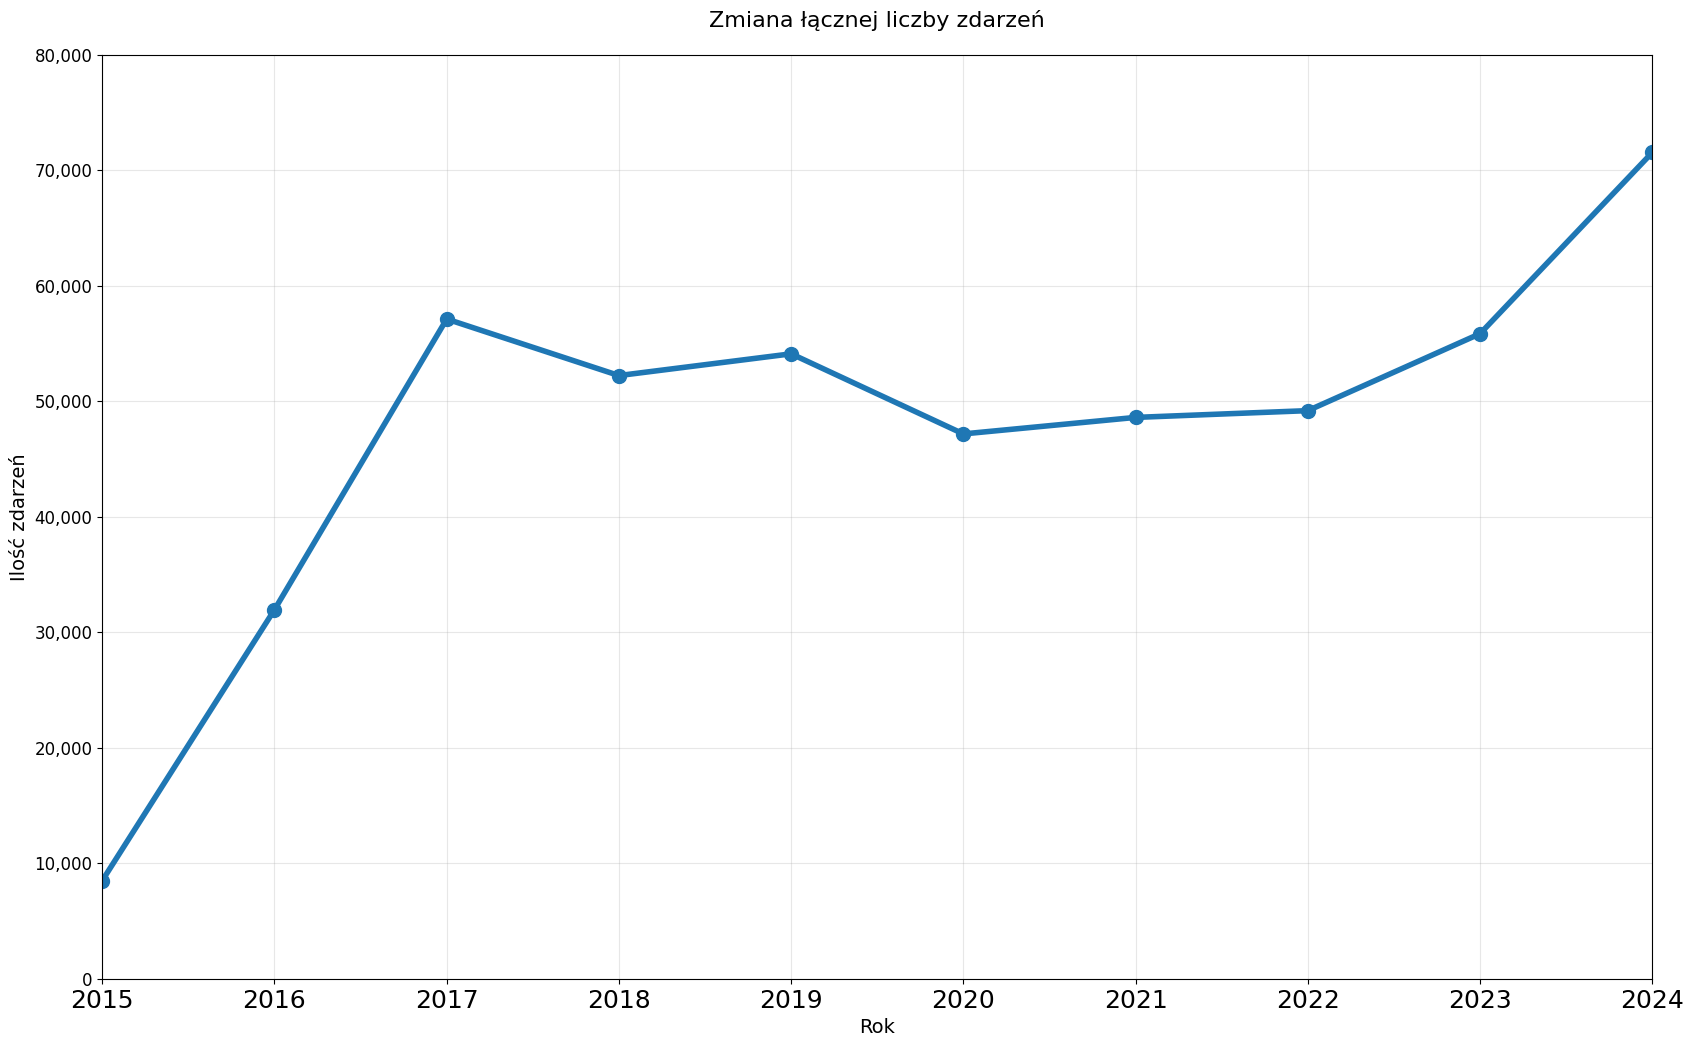

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv("MiddleEast_2015-2024_Nov01.csv")
events_per_year = df.groupby('year')['event_id_cnty'].count().reset_index()

plt.figure(figsize=(20, 12))

# Plot with thicker line and markers
plt.plot(
    events_per_year['year'],
    events_per_year['event_id_cnty'],
    marker='o',
    linewidth=4,
    markersize=10,
    color='tab:blue'
)

# Axis settings
plt.xlabel("Rok", fontsize=14)
plt.xlim(2015, 2024)
plt.ylabel("Ilość zdarzeń", fontsize=14)
plt.ylim(0, 80000)

# Y-axis ticks with 10k steps
plt.yticks(
    ticks=range(0, 80001, 10000),
    labels=['0', '10,000', '20,000', '30,000', '40,000', '50,000', '60,000', '70,000', '80,000'],
    fontsize=12
    
)

plt.title("Zmiana łącznej liczby zdarzeń", fontsize=16, pad=20)
plt.grid(True, alpha=0.3)
plt.show()

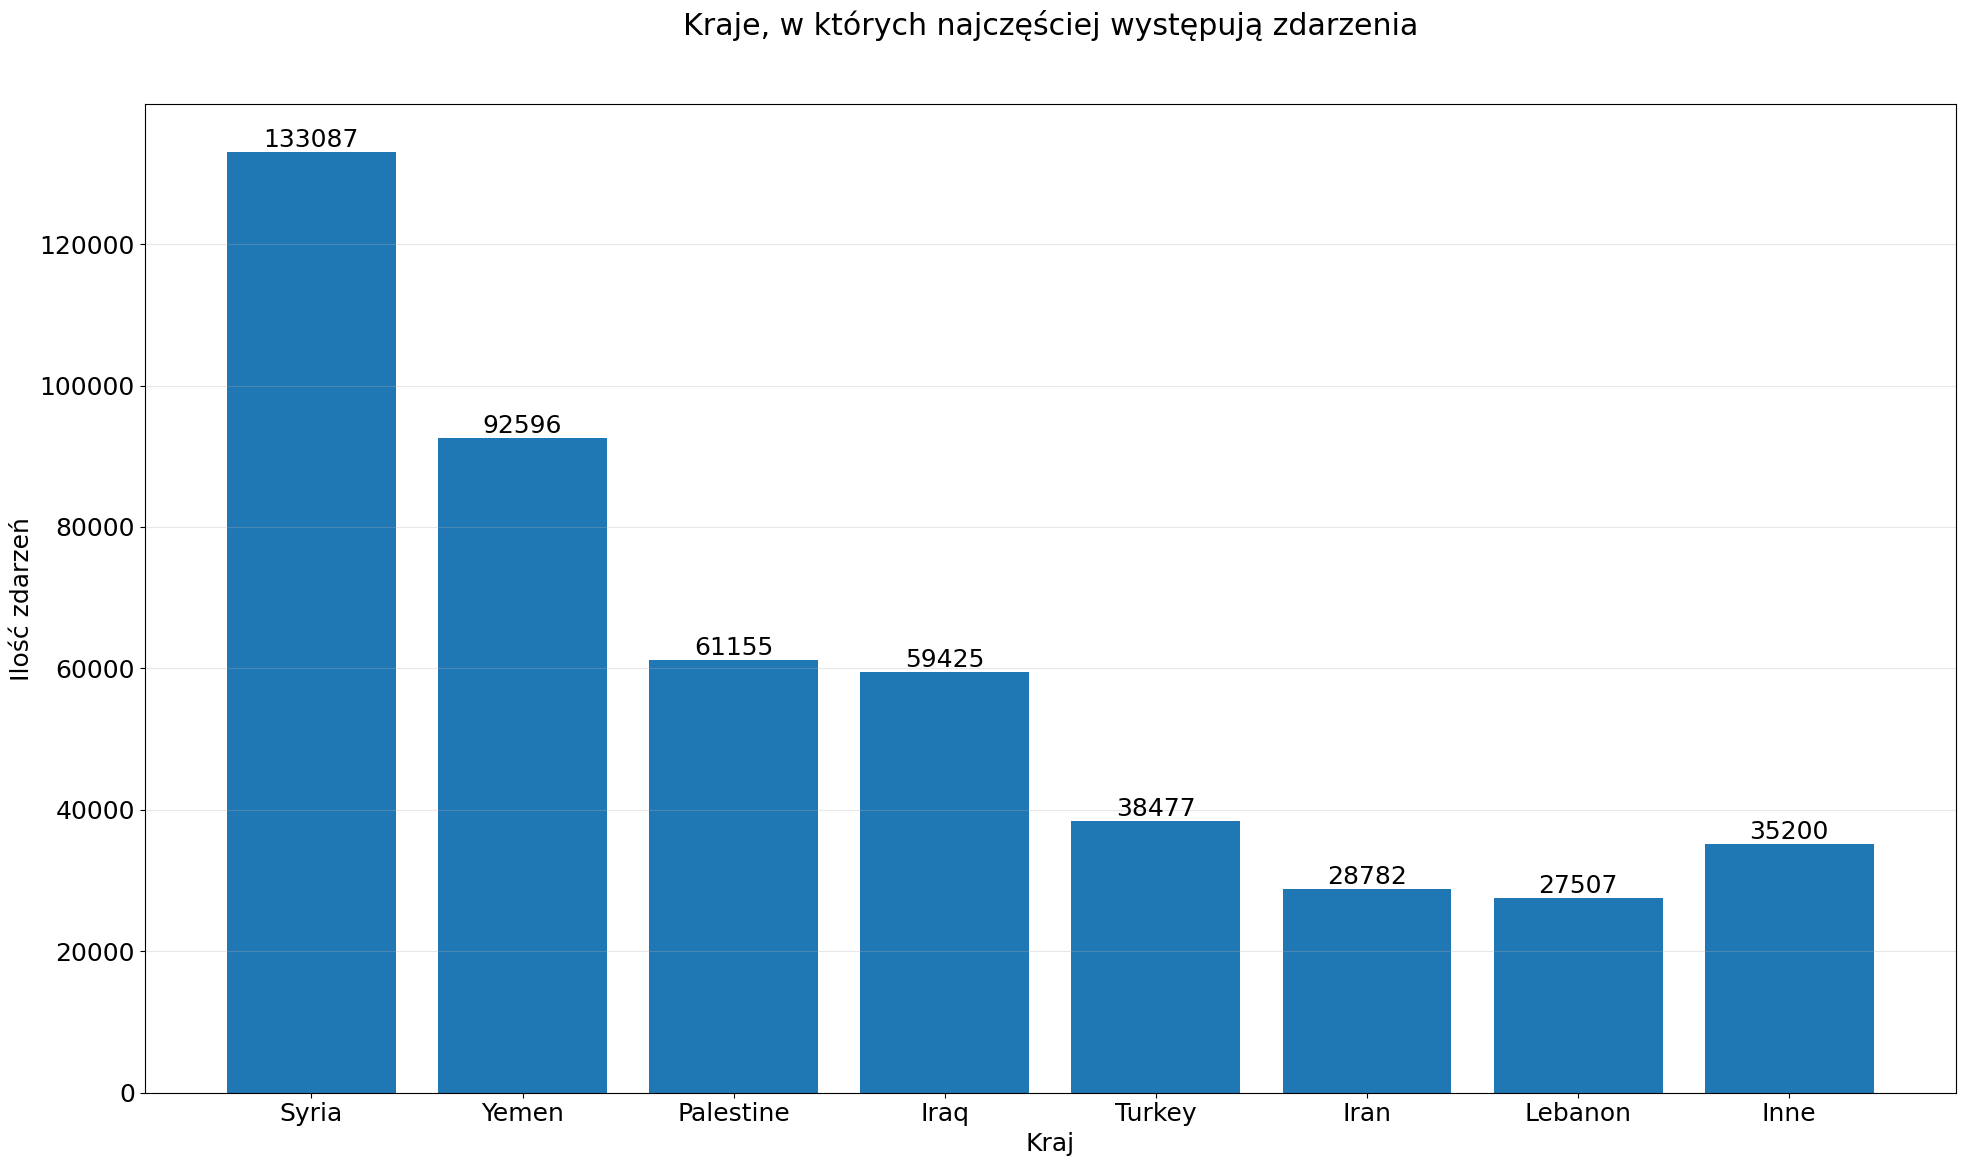

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Example threshold
threshold = 25000

# 1. Count events by country
country_counts = df.groupby('country')['event_id_cnty'].count().reset_index(name='count')

# 2. Separate countries at or above the threshold
above_threshold = country_counts[country_counts['count'] >= threshold].copy()

# 3. Sum the rest into a single 'Other' category
other_sum = country_counts[country_counts['count'] < threshold]['count'].sum()

# 4. Sort those above threshold descending by count
above_threshold.sort_values(by='count', ascending=False, inplace=True)

# 5. Append the 'Other' row at the bottom (so it appears last in the chart)
other_row = pd.DataFrame({'country': ['Inne'], 'count': [other_sum]})
plot_data = pd.concat([above_threshold, other_row], ignore_index=True)

# 6. Plot the bar chart
plt.figure(figsize=(20, 12))
bars = plt.bar(plot_data['country'], plot_data['count'])

# 7. Add numeric labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position: center of the bar
        height + 0.5,                      # y-position: just above the bar
        str(height),                       # text: the count
        ha='center',                       # horizontal alignment
        va='bottom'                        # vertical alignment
    )

plt.xlabel("Kraj")
plt.ylabel("Ilość zdarzeń")
#add a title, WAY OVER the chart


plt.title(f"Kraje, w których najczęściej występują zdarzenia",  pad=50)
plt.xticks(rotation=0)  # Rotate if needed
plt.tight_layout()
#add grid just for y values
plt.grid(axis='y', alpha=0.3)
plt.show()


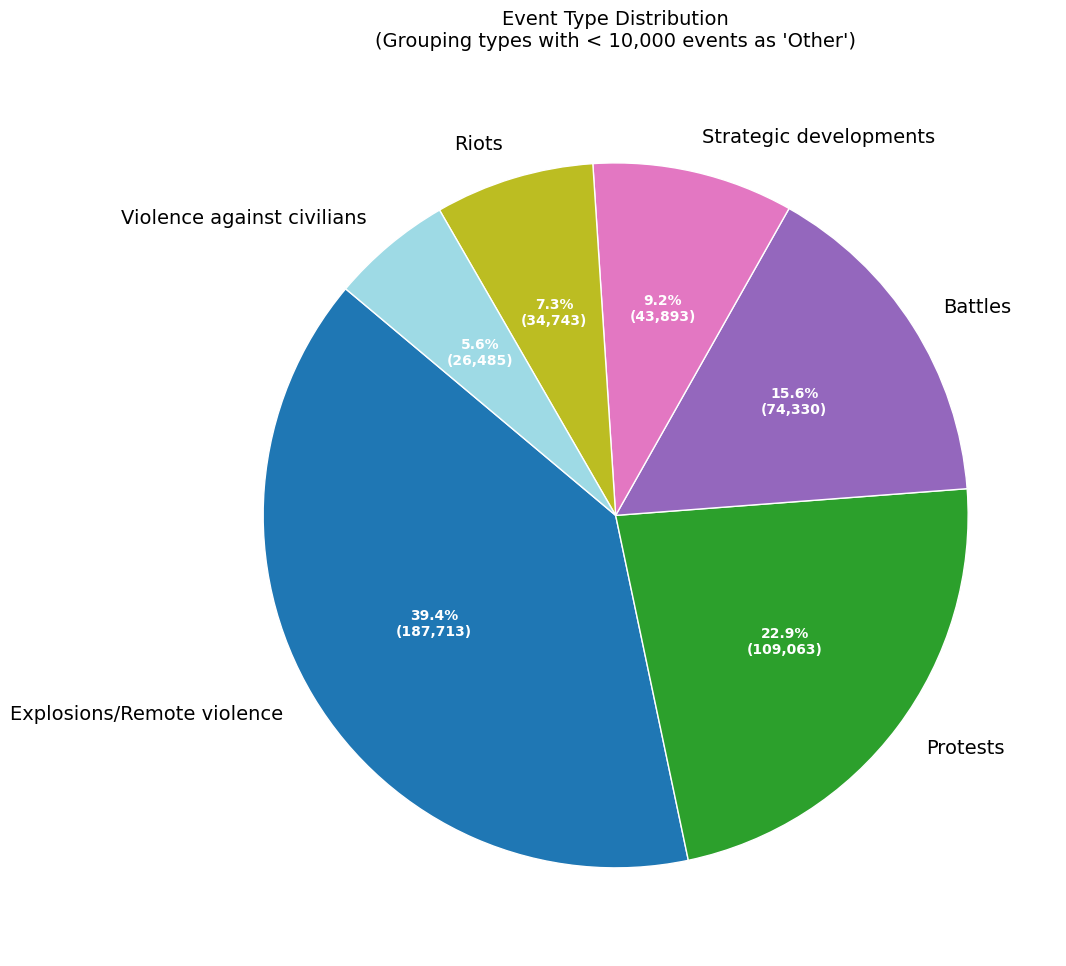

In [54]:
# Count events per event_type using existing df
type_counts = df.groupby('event_type')['event_id_cnty'].nunique().reset_index(name='count')

# Separate and process categories
threshold = 10000
big = type_counts[type_counts['count'] >= threshold]
small = type_counts[type_counts['count'] < threshold]

# Create 'Other' category if needed
if not small.empty:
    other_row = pd.DataFrame({
        'event_type': ['Other'],
        'count': [small['count'].sum()]
    })
    big = pd.concat([big, other_row], ignore_index=True)

# Sort descending but keep 'Other' last (FIXED)
big['sort_key'] = big.apply(
    lambda row: float('inf') if row['event_type'] == 'Other' else -row['count'],
    axis=1
)
big = big.sort_values('sort_key').drop(columns='sort_key')

# Prepare plot data
labels = big['event_type']
sizes = big['count']
explode = [0.1 if label == 'Other' else 0 for label in labels]

# Create figure
plt.figure(figsize=(20, 10))
cmap = plt.cm.tab20
colors = cmap(np.linspace(0, 1, len(labels)))

# Create pie chart
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*sizes.sum()):,})',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 14}
)

# Formatting
plt.setp(autotexts, size=10, weight='bold', color='white')
plt.title(f"Event Type Distribution\n(Grouping types with < {threshold:,} events as 'Other')", fontsize=14, pad=20)


plt.tight_layout()
plt.show()

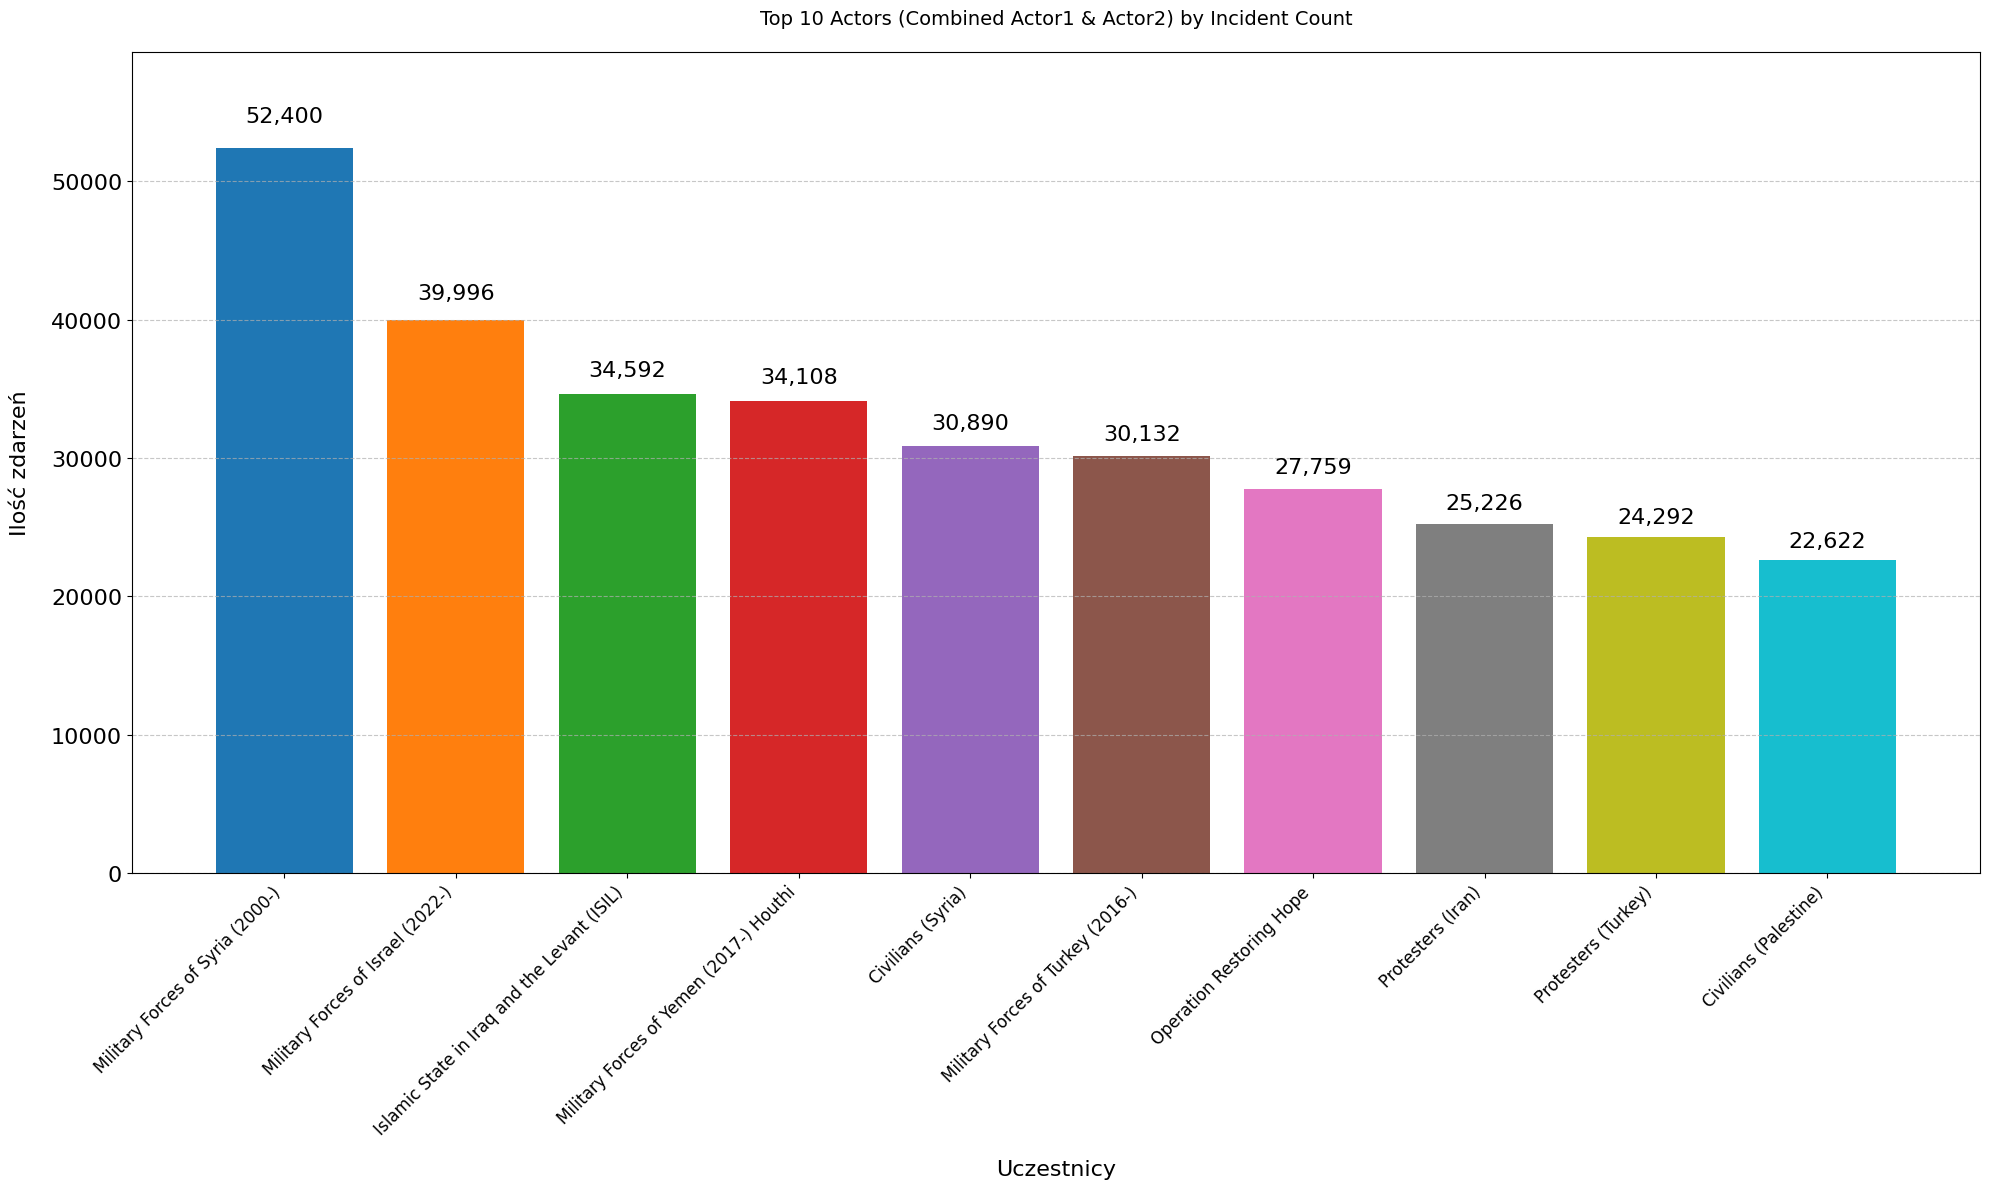

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine actor1 and actor2 into a single list
actors_combined = (
    df[['actor1', 'actor2']]  # Select both columns
    .melt(value_name='actor')  # Stack them vertically
    .dropna(subset=['actor'])  # Remove rows with missing actors
)

# Count occurrences of all actors
actor_counts = actors_combined['actor'].value_counts().reset_index()
actor_counts.columns = ['actor', 'count']

# Select top 10 actors and sort them
top_10 = actor_counts.head(10).sort_values('count', ascending=False)

plt.figure(figsize=(20, 12))

# Create bars with different colors
bars = plt.bar(top_10['actor'], top_10['count'],
               color=plt.cm.tab10(range(len(top_10))))

# Customize labels and layout
plt.xlabel("Uczestnicy", fontsize=16, labelpad=15)
plt.ylabel("Ilość zdarzeń", fontsize=16, labelpad=15)
plt.title("Top 10 Actors (Combined Actor1 & Actor2) by Incident Count", fontsize=14, pad=20)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels
max_label_pos = 0
for bar in bars:
    height = bar.get_height()
    label_pos = height + 0.03 * height
    plt.text(bar.get_x() + bar.get_width()/2.,
             label_pos,
             f'{height:,}',
             ha='center',
             va='bottom',
             fontsize=16)
    if label_pos > max_label_pos:
        max_label_pos = label_pos

# Adjust y-axis limit
plt.ylim(top=max_label_pos * 1.1)

# increase font on y axis
plt.yticks(fontsize=16)

# Add grid and clean up
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

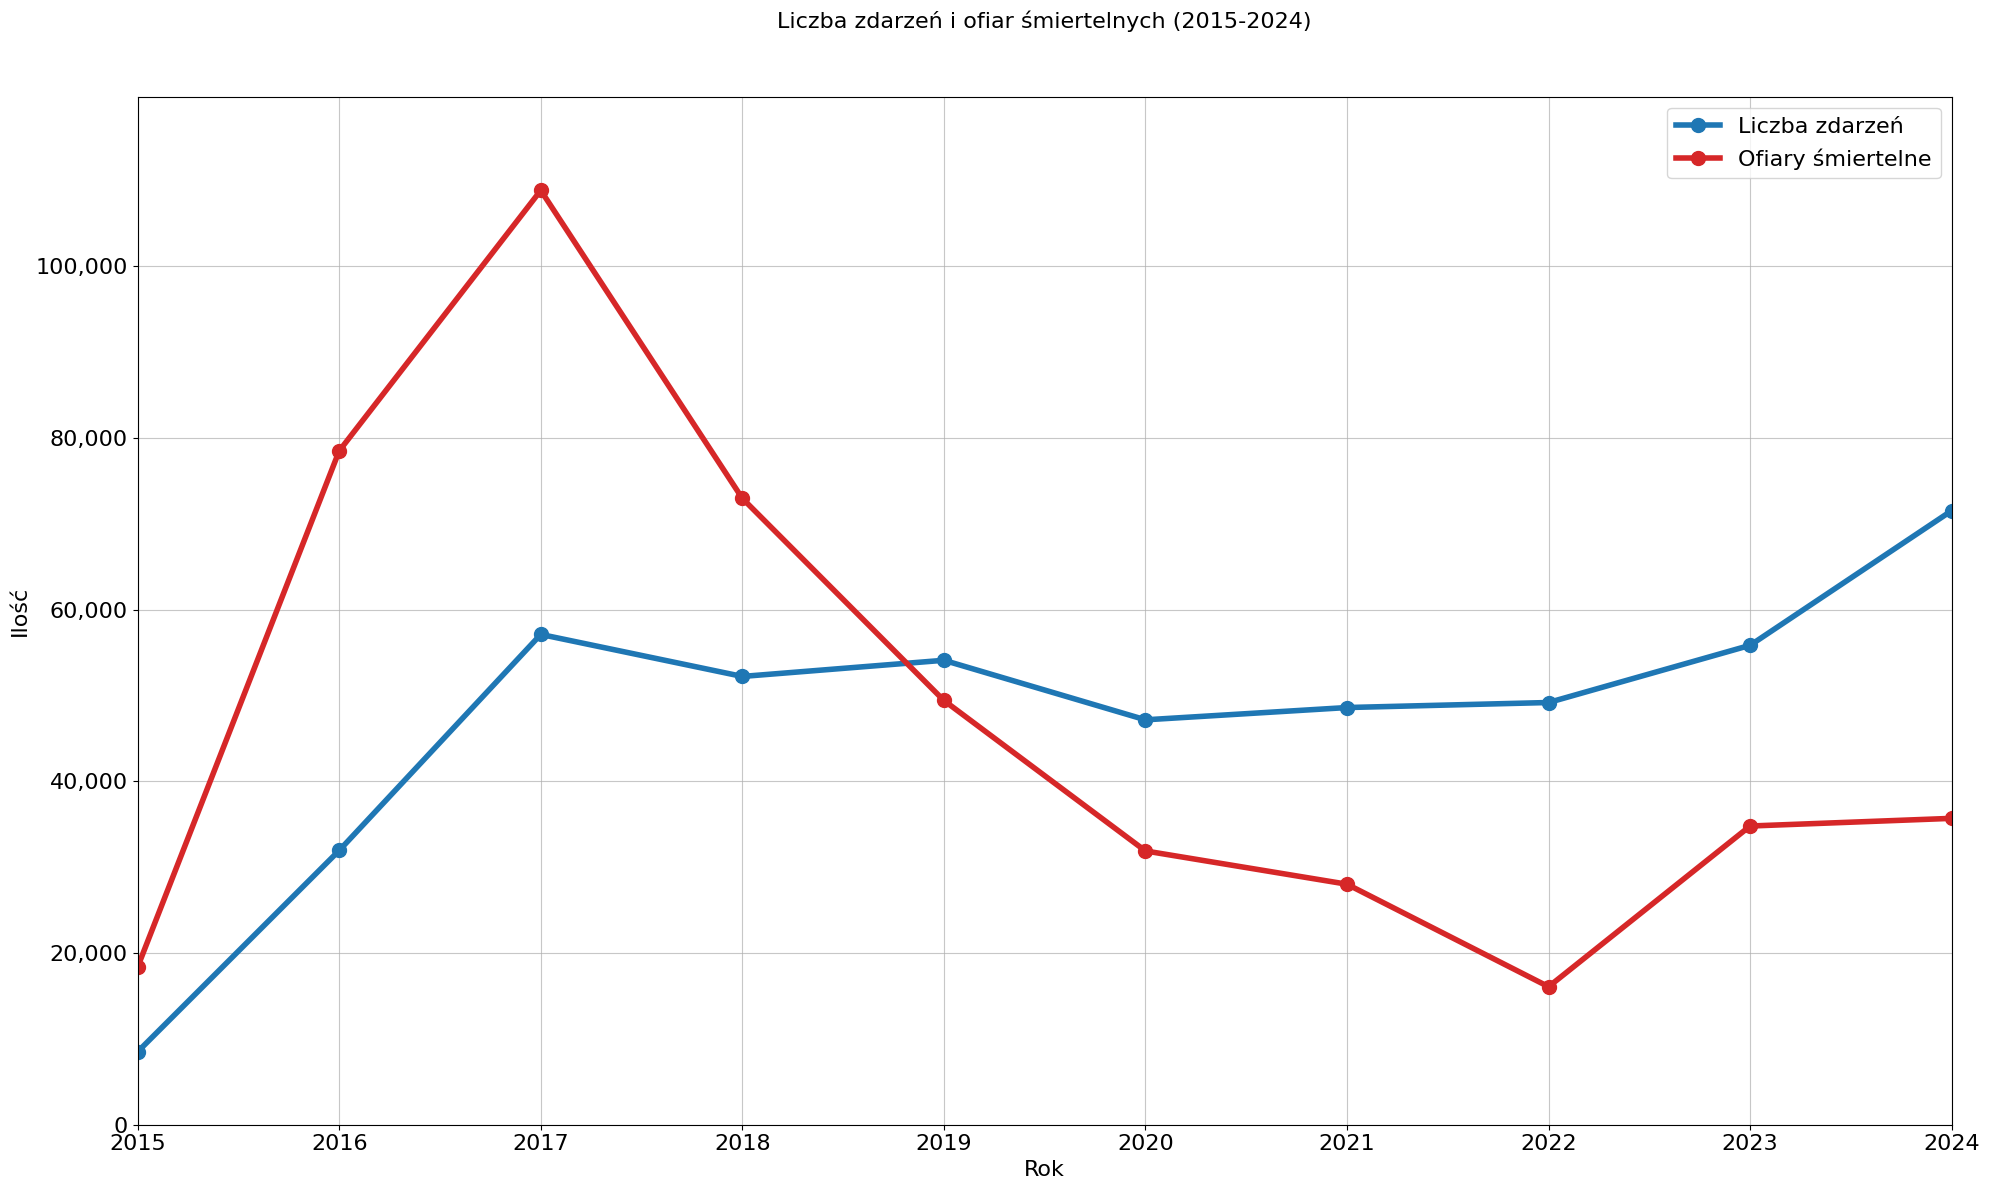

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate data
events_per_year = df.groupby('year')['event_id_cnty'].count().reset_index()
fatalities_per_year = df.groupby('year')['fatalities'].sum().reset_index()

# Merge data
merged_data = events_per_year.merge(fatalities_per_year, on='year', how='outer').fillna(0)

# Ensure all years are included (2015-2024)
full_years = pd.DataFrame({'year': range(2015, 2025)})
merged_data = full_years.merge(merged_data, on='year', how='left').fillna(0)

# Normalize fatalities to match the event scale (if needed)
# Example: If fatalities are 10x smaller, multiply by 10 to make trends comparable
# merged_data['fatalities_scaled'] = merged_data['fatalities'] * 10

plt.figure(figsize=(20, 12))

# Plot both lines on the same axis
plt.plot(
    merged_data['year'],
    merged_data['event_id_cnty'],
    marker='o',
    linewidth=4,
    markersize=10,
    color='tab:blue',
    label='Liczba zdarzeń'
)

plt.plot(
    merged_data['year'],
    merged_data['fatalities'],
    marker='o',
    linewidth=4,
    markersize=10,
    color='tab:red',
    label='Ofiary śmiertelne'
)

# Axis settings
plt.xlabel("Rok", fontsize=16)
plt.xlim(2015, 2024)
plt.ylabel("Ilość", fontsize=16)
plt.ylim(0, max(merged_data['event_id_cnty'].max(), merged_data['fatalities'].max()) * 1.1)

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# set font size on x and y axis to 16
plt.xticks(merged_data['year'], fontsize=16)
plt.yticks(fontsize=16)

plt.title("Liczba zdarzeń i ofiar śmiertelnych (2015-2024)", fontsize=16, pad=50)
plt.legend(fontsize=16)
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

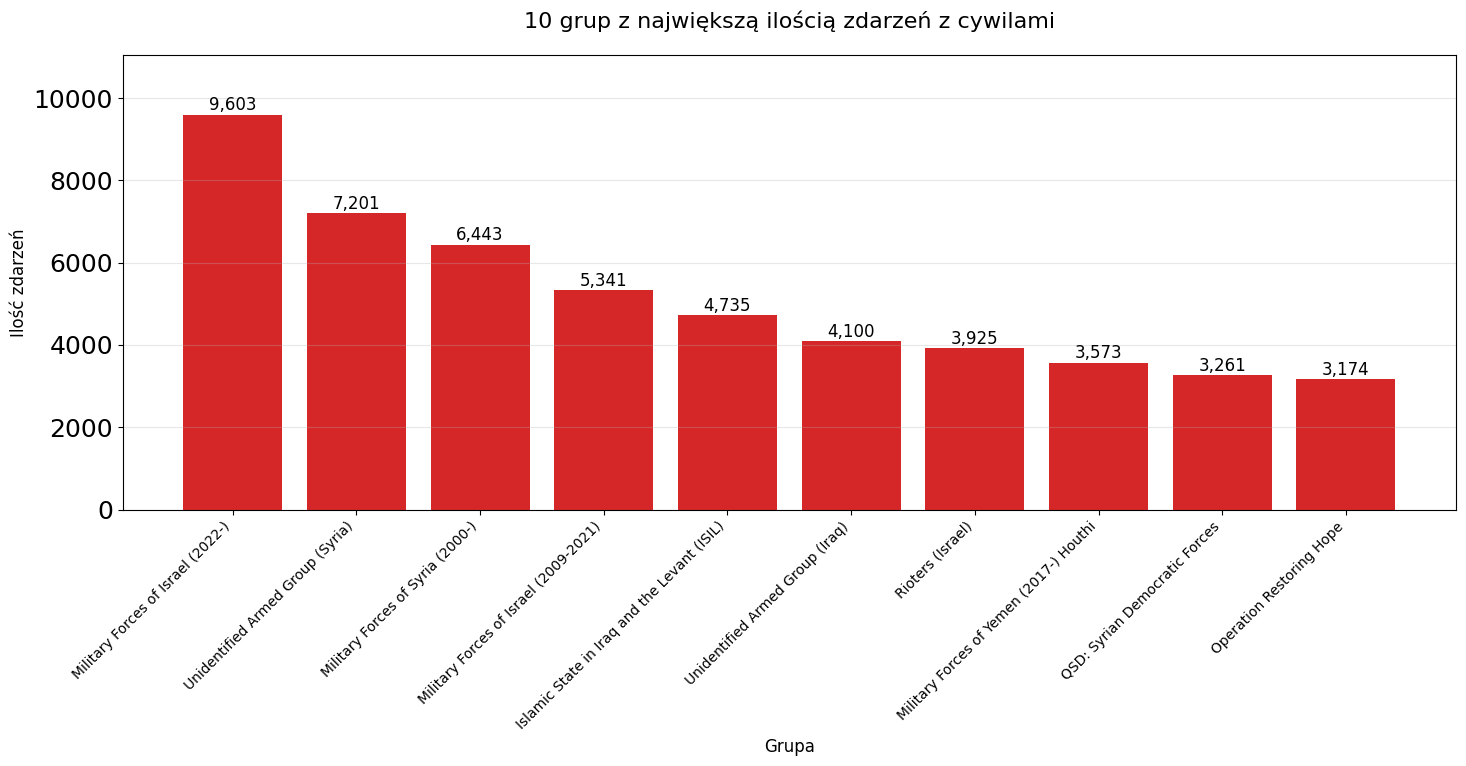

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter events where actor2 starts with 'Civilians'
civilian_events = df[df['actor2'].str.startswith('Civilians', na=False)]

# Count events per actor1 and keep top 10
actor_counts = (
    civilian_events.groupby('actor1')['event_id_cnty']
    .count()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(10)  # <- Only this line changed
)

# Plot
plt.figure(figsize=(15, 8))
bars = plt.bar(actor_counts['actor1'], actor_counts['count'], color='tab:red')

# Customize
plt.title("10 grup z największą ilością zdarzeń z cywilami", fontsize=16, pad=20)
plt.xlabel("Grupa", fontsize=12)
plt.ylabel("Ilość zdarzeń", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 5,
        f'{height:,}',
        ha='center',
        va='bottom',
        fontsize=12  # Slightly larger font
    )

# Auto-adjust y-axis limit for better spacing
plt.ylim(top=actor_counts['count'].max() * 1.15)

plt.tight_layout()
plt.show()

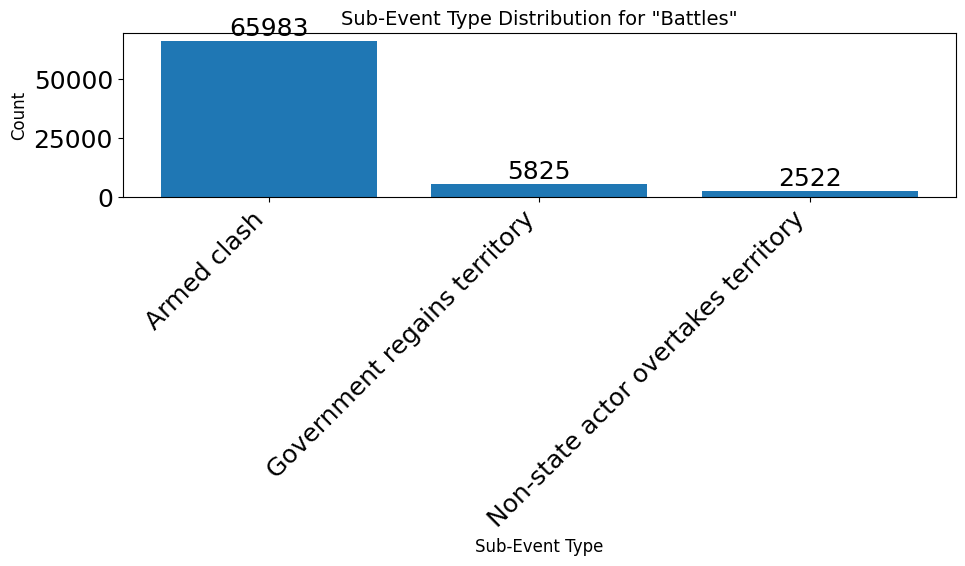

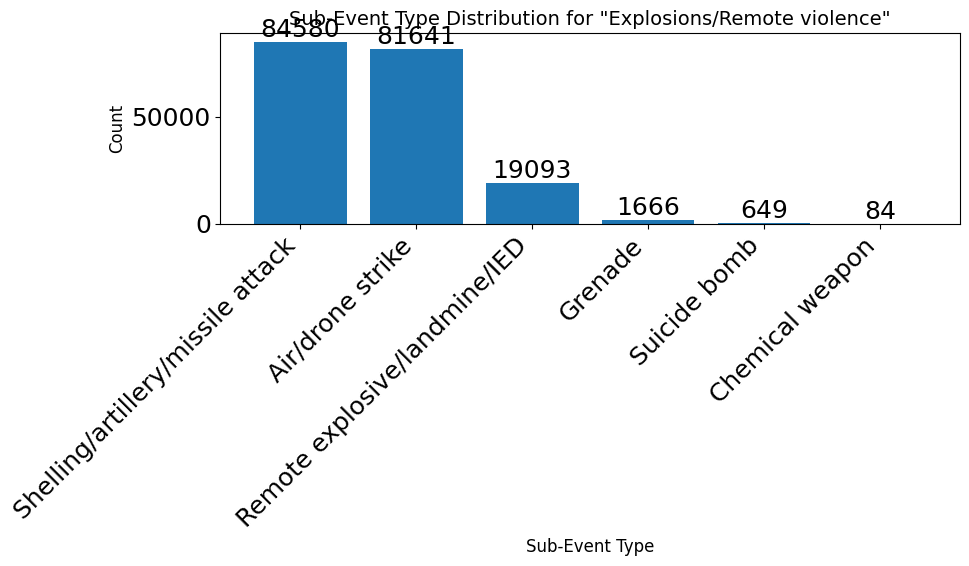

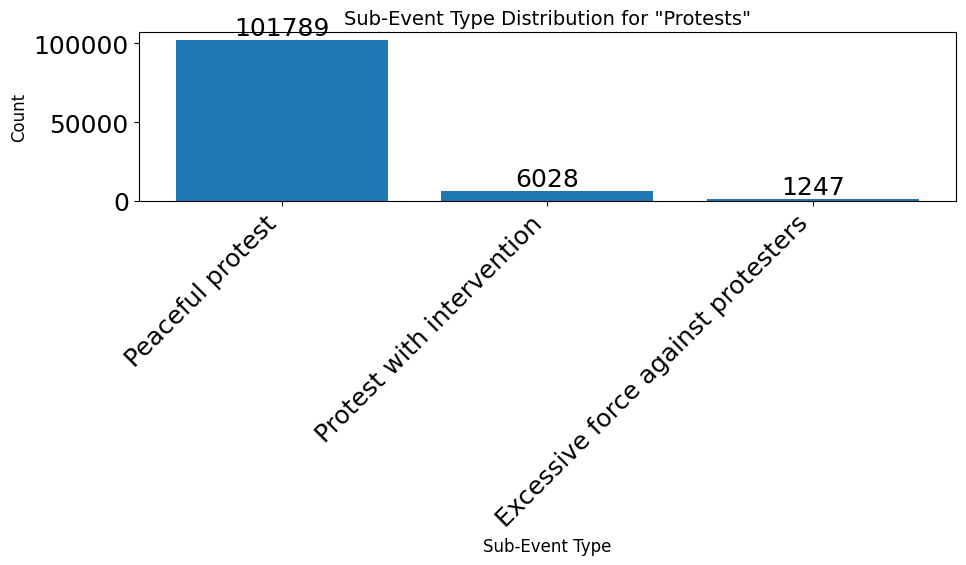

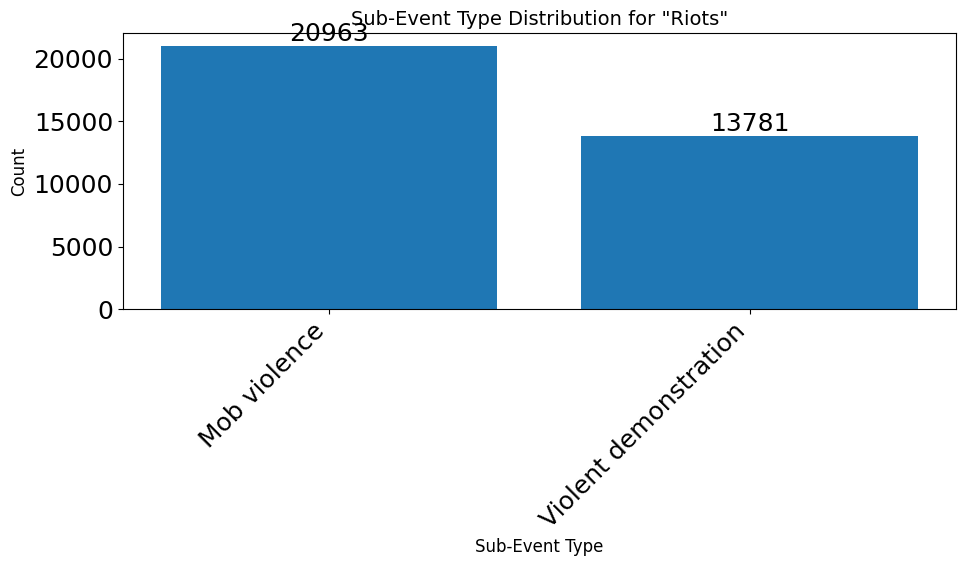

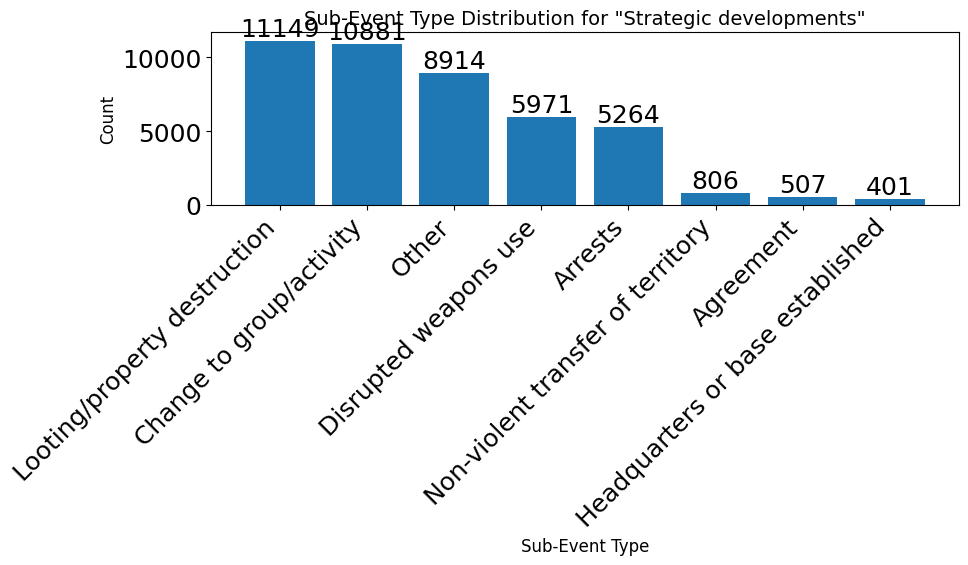

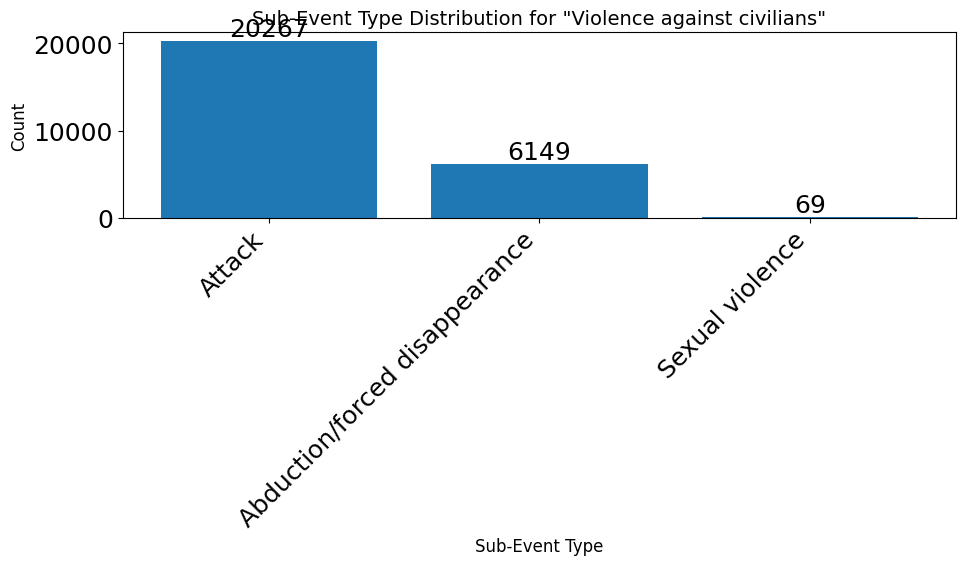

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is already loaded as df

# Clean data by removing rows with missing event types or sub-event types
df = df.dropna(subset=['event_type', 'sub_event_type'])

# Get counts for each event_type and sub_event_type combination
event_sub_counts = df.groupby(['event_type', 'sub_event_type']).size().reset_index(name='count')

# Get unique event types
event_types = event_sub_counts['event_type'].unique()

# Create a bar plot for each event type
for event_type in event_types:
    # Filter data for current event type
    subset = event_sub_counts[event_sub_counts['event_type'] == event_type]

    # Sort by count for better visualization
    subset = subset.sort_values('count', ascending=False)

    # Create figure
    plt.figure(figsize=(10, 6))

    # Create bars with numpy for x positioning
    x = np.arange(len(subset))
    bars = plt.bar(x, subset['count'])

    # Customize plot
    plt.title(f'Sub-Event Type Distribution for "{event_type}"', fontsize=14)
    plt.xlabel('Sub-Event Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(x, subset['sub_event_type'], rotation=45, ha='right')

    # Add data labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

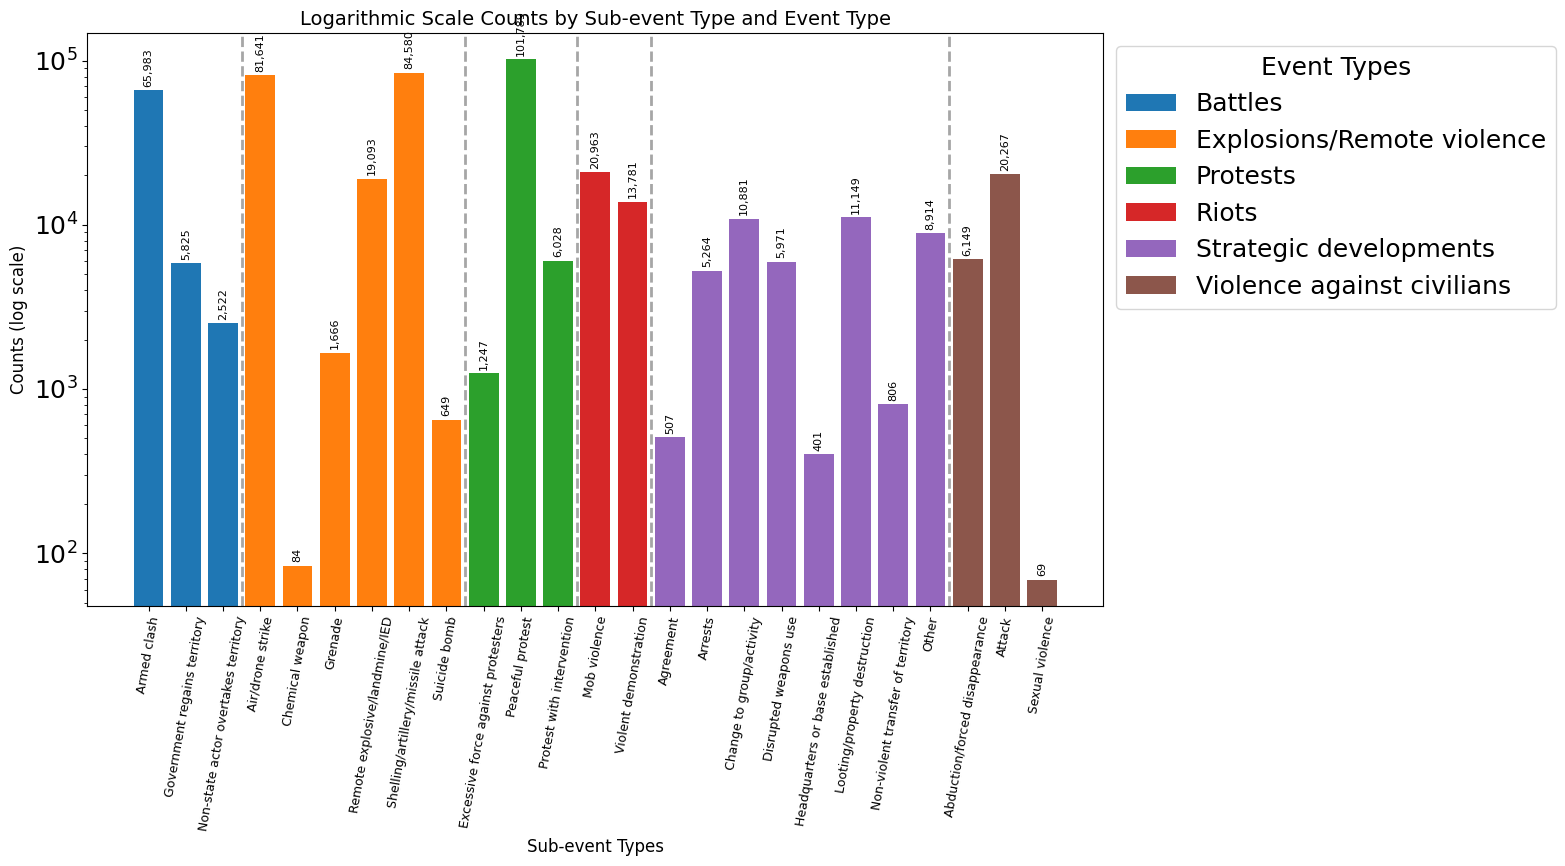

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences per sub-event type within event type
counts_df = df.groupby(['event_type', 'sub_event_type']).size().reset_index(name='counts')

# Set up the figure
plt.figure(figsize=(16, 9))

# Define colors per event_type group
event_types = counts_df['event_type'].unique()
colors = plt.cm.tab10.colors

positions = []
labels = []
separator_positions = []
current_pos = 0

# Plot bars grouped by event type with numerical labels and separators
for idx, event in enumerate(event_types):
    sub_df = counts_df[counts_df['event_type'] == event]
    bar_pos = np.arange(current_pos, current_pos + len(sub_df))

    bars = plt.bar(bar_pos, sub_df['counts'], color=colors[idx % len(colors)], label=event)

    # Add numeric values above bars with improved visibility
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 yval * 1.05,  # Slightly offset above bar
                 f'{int(yval):,}',
                 ha='center',
                 va='bottom',
                 rotation=90,
                 fontsize=8,
                 color='black')  # Changed to black for contrast

    positions.extend(bar_pos)
    labels.extend(sub_df['sub_event_type'])
    current_pos += len(sub_df)

    # Add separator positions after each event group (except last)
    if idx < len(event_types) - 1:
        separator_positions.append(current_pos - 0.5)

# Draw visible separator lines
for sep in separator_positions:
    plt.axvline(x=sep,
                color='gray',  # Changed to visible color
                linestyle='--',
                linewidth=2,
                alpha=0.7)

# Customize axes
plt.yscale('log')
plt.xticks(positions, labels, rotation=80, fontsize=9)
plt.ylabel('Counts (log scale)', fontsize=12)
plt.xlabel('Sub-event Types', fontsize=12)
plt.title('Logarithmic Scale Counts by Sub-event Type and Event Type', fontsize=14)

# Add legend
plt.legend(title='Event Types', bbox_to_anchor=(1, 1), loc='upper left')

# Improve layout
plt.tight_layout()

# Show plot
plt.show()